Image loaded successfully.


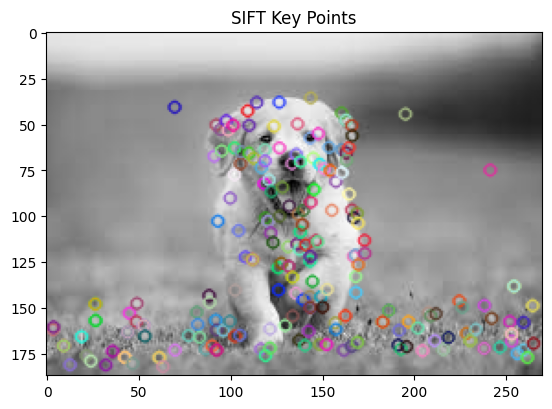

Descriptors:  [[ 16.  85.  92. ...   0.   0.   0.]
 [  0.   0.   0. ...  10.   9.  59.]
 [  0.   0.   0. ...   2.   2.  20.]
 ...
 [  6. 100. 105. ...  95.  21.   2.]
 [ 18.  16.  60. ...   0.   1.  93.]
 [ 32.  59.  36. ...   1.   0.   0.]]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image as grayscale
img = cv2.imread('img2.jpeg', cv2.IMREAD_GRAYSCALE)

# Ensure image is loaded correctly
if img is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully.")

    # Step 1: Constructing a Scale Space using Gaussian Blurring
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Step 2: Key Point Localization - Detect Key Points using SIFT
    keypoints, descriptors = sift.detectAndCompute(img, None)

    # Step 3: Orientation Assignment - Automatically handled by SIFT

    # Step 4: Key Point Descriptors - Already computed with detectAndCompute

    # Visualizing the key points on the image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
    plt.imshow(img_with_keypoints)
    plt.title('SIFT Key Points')
    plt.show()

    # If you want to print out the descriptors:
    print("Descriptors: ", descriptors)


Download yolo.weights from: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi46vabruaJAxV8UGwGHSQiI9MQFnoECDQQAQ&url=https%3A%2F%2Fsourceforge.net%2Fprojects%2Fyolov3.mirror%2Ffiles%2Fv8%2Fyolov3.weights%2F&usg=AOvVaw1mak7RYm7oKgJ4utimXLEx&opi=89978449

In [ ]:
import cv2
import numpy as np

# Load YOLO
yolo_net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class labels (use the coco.names file for the COCO dataset)
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load input image
img = cv2.imread('img2.jpeg')

# Prepare the image for YOLO detection (normalize and reshape)
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Set the input to the model
yolo_net.setInput(blob)

# Get output layer names
layer_names = yolo_net.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo_net.getUnconnectedOutLayers()]

# Forward pass to get predictions
outs = yolo_net.forward(output_layers)

# Initialize variables for bounding boxes, class ids, and confidences
class_ids = []
confidences = []
boxes = []

# Process each prediction
height, width, _ = img.shape
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Get center (x, y), width, and height of the bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Check if NMS has returned valid indices
if len(indices) > 0:
    # Draw the bounding boxes and class labels
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label + f" {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Show the image with detections
    cv2.imshow("Image with Detections", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No objects detected.")
